In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.DataFrame({'salary':[1.7,2.4,2.3,3.1,3.7,4.2,4.4,6.1,5.4,5.7,6.4,6.2],
                'experience':[1.2,1.5,1.9,2.2,2.4,2.5,2.8,3.1,3.3,3.7,4.2,4.4]})

In [3]:
y = df['salary']
x = df['experience']
x = np.array(x)
y = np.array(y)
n = len(x)

In [4]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_log_loss(B0, B1, X, Y):
    predictions = sigmoid(B0 + B1 * X)
    return -np.mean(Y * np.log(predictions) + (1 - Y) * np.log(1 - predictions))

def gradient_descent_logistic(X, Y, learning_rate=0.1, epochs=100):
    B0 = np.random.rand() 
    B1 = np.random.rand() 
    log_loss_values = []
    slopes = []
    
    for _ in range(epochs):
        Y_pred = sigmoid(B0 + B1 * X)
        error = Y - Y_pred

        B0 = B0 + learning_rate * np.sum(error)
        B1 = B1 + learning_rate * np.sum(error * X)

        log_loss = compute_log_loss(B0, B1, X, Y)
        log_loss_values.append(log_loss)
        slopes.append(B1)

    return slopes, log_loss_values

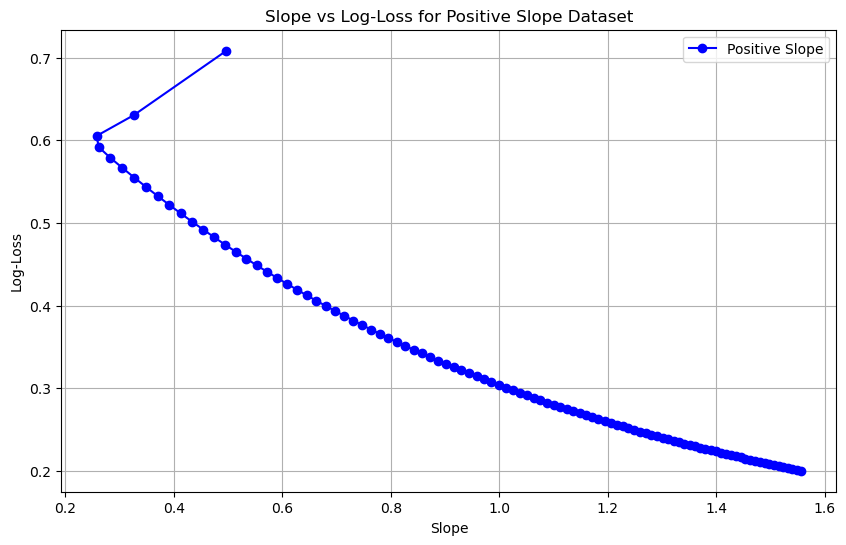

In [5]:
X_pos = np.array([1, 2, 3, 4, 5])
Y_pos = np.array([0, 0, 1, 1, 1])

X_neg = np.array([1, 2, 3, 4, 5])
Y_neg = np.array([1, 1, 0, 0, 0])

slopes_pos, log_loss_values_pos = gradient_descent_logistic(X_pos, Y_pos)
slopes_neg, log_loss_values_neg = gradient_descent_logistic(X_neg, Y_neg)

plt.figure(figsize=(10, 6))
plt.plot(slopes_pos, log_loss_values_pos, color='blue', marker='o', linestyle='-', label='Positive Slope')
plt.xlabel('Slope')
plt.ylabel('Log-Loss')
plt.title('Slope vs Log-Loss for Positive Slope Dataset')
plt.grid(True)
plt.legend()
plt.show()


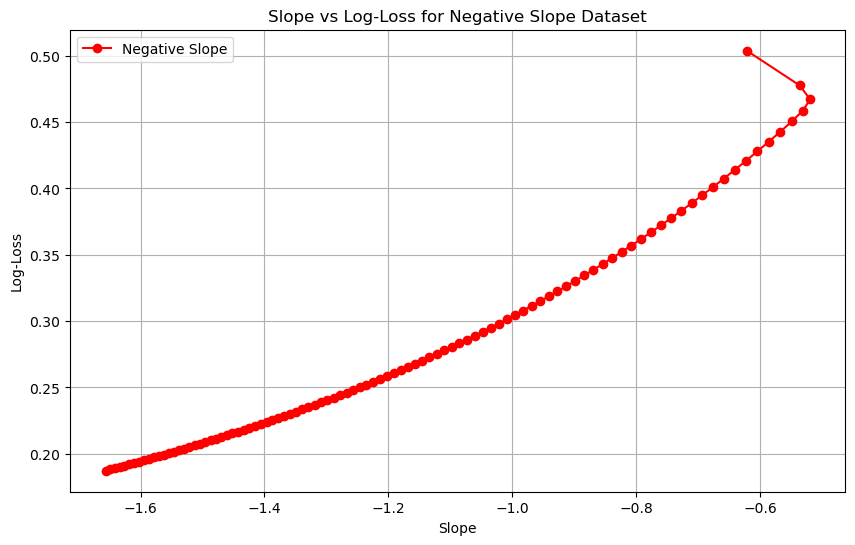

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(slopes_neg, log_loss_values_neg, color='red', marker='o', linestyle='-', label='Negative Slope')
plt.xlabel('Slope')
plt.ylabel('Log-Loss')
plt.title('Slope vs Log-Loss for Negative Slope Dataset')
plt.grid(True)
plt.legend()
plt.show()